<a href="https://colab.research.google.com/github/Minch13r/DeepLearn/blob/main/abalone_%EA%B3%BC%EC%A0%9C_1%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터 로드 및 전처리

   id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   0   M   0.455     0.365   0.095        0.5140          0.2245   
1   1   M   0.350     0.265   0.090        0.2255          0.0995   
2   2   F   0.530     0.420   0.135        0.6770          0.2565   
3   3   M   0.440     0.365   0.125        0.5160          0.2155   
4   4   I   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


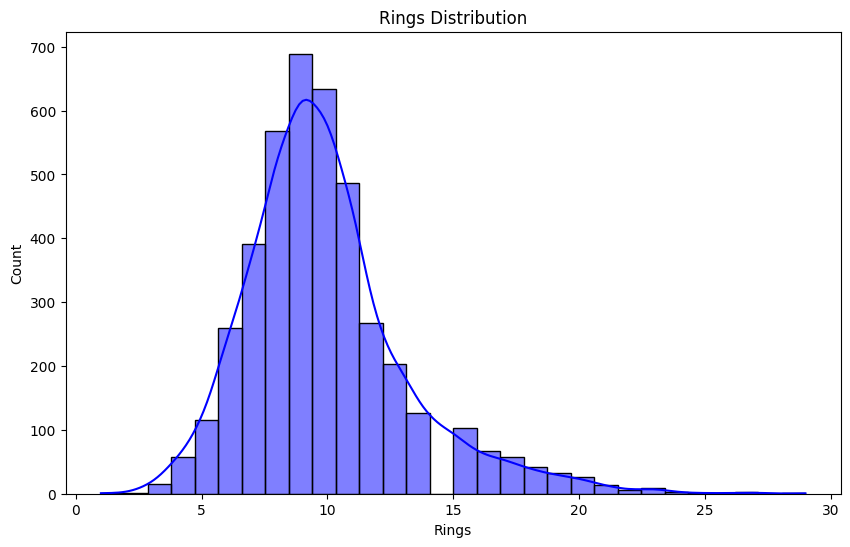

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 전복 데이터 로드 (rawgithub 사용)
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv"
df = pd.read_csv(url)

# 데이터 확인
print(df.head())

# Sex 칼럼을 수치형으로 변환 (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Features와 레이블 분리 (Rings를 분류 및 회귀의 타겟으로 사용)
X = df.drop(['id', 'Rings'], axis=1)  # id는 제외
y = df['Rings']

# 데이터 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=30, color='blue')
plt.title('Rings Distribution')
plt.show()

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


2. 머신러닝 분류 (Rings를 분류 문제로 설정)

In [3]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Rings를 분류형으로 전환 (분류를 위해 범주형 처리)
y_class = np.where(y <= 10, 0, 1)  # 임의로 나이를 기준으로 10 이하, 10 이상으로 분류

# 데이터 재분할 (분류용)
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# 1. Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, svm_preds))

# 2. Random Forest (RF)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

# 3. Decision Tree (DT)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_preds))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.85       560
           1       0.71      0.59      0.64       276

    accuracy                           0.78       836
   macro avg       0.76      0.73      0.74       836
weighted avg       0.78      0.78      0.78       836

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       560
           1       0.68      0.69      0.68       276

    accuracy                           0.79       836
   macro avg       0.76      0.76      0.76       836
weighted avg       0.79      0.79      0.79       836

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       560
           1       0.58      0.57      0.57       276

    accuracy                           0.72       836
   macro avg       0.68 

3. 머신러닝 회귀 (Rings를 연속형으로 예측)

Linear Regression MSE: 4.8912, R2 Score: 0.5482


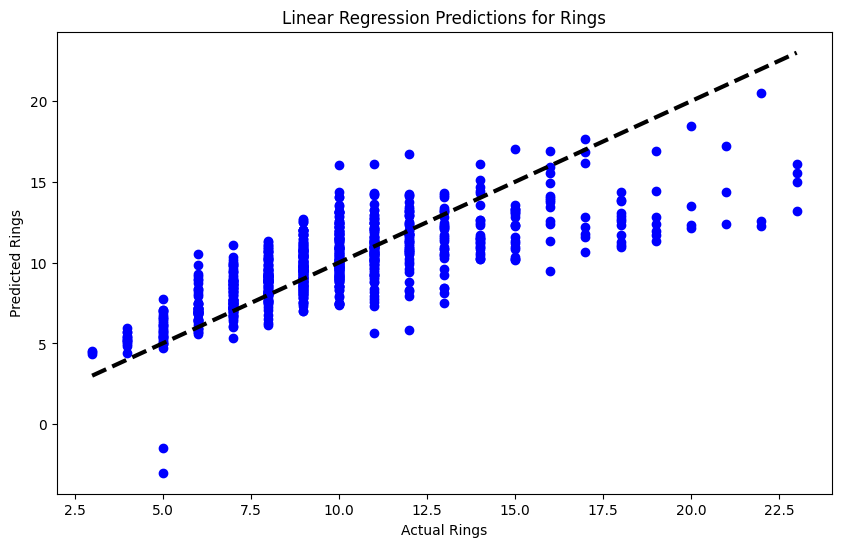

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 재분할 (회귀용)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)
lr_preds = lr_model.predict(X_test_reg)

# 평가
mse_lr = mean_squared_error(y_test_reg, lr_preds)
r2_lr = r2_score(y_test_reg, lr_preds)
print(f'Linear Regression MSE: {mse_lr:.4f}, R2 Score: {r2_lr:.4f}')

# 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, lr_preds, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=3)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Linear Regression Predictions for Rings')
plt.show()


4. 신경망 분류 (Dense Layer만 사용)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6544 - loss: 0.6390 - val_accuracy: 0.7010 - val_loss: 0.5608
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7183 - loss: 0.5390 - val_accuracy: 0.6816 - val_loss: 0.5499
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7121 - loss: 0.5224 - val_accuracy: 0.6861 - val_loss: 0.5459
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7183 - loss: 0.5123 - val_accuracy: 0.7115 - val_loss: 0.5344
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7320 - loss: 0.5045 - val_accuracy: 0.7369 - val_loss: 0.5171
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7217 - loss: 0.5090 - val_accuracy: 0.7354 - val_loss: 0.5210
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7441 - loss: 0.4983 - val_accuracy: 0.7205 - val_loss: 0.5243
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7437 - loss: 0.4968 - val_accuracy: 0.7369 - val_loss: 0.5068
Epo

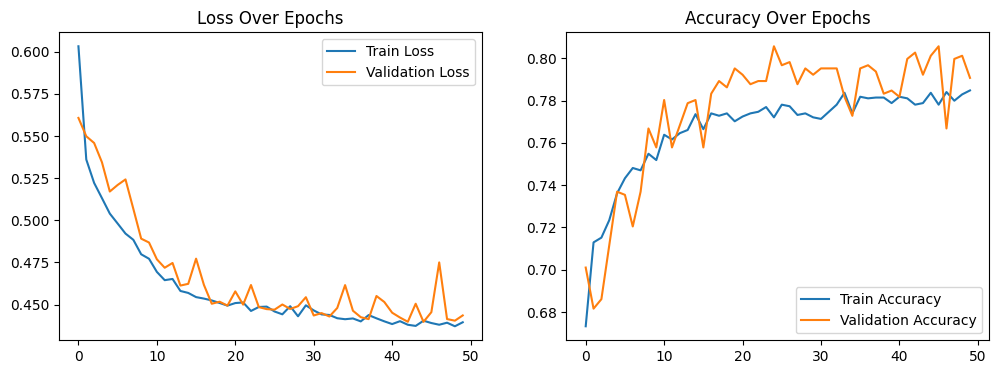

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 신경망 분류 모델 정의
model_class = Sequential()
model_class.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_class.add(Dense(32, activation='relu'))
model_class.add(Dense(1, activation='sigmoid'))  # 이진 분류이므로 sigmoid 사용

# 모델 컴파일
model_class.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history_class = model_class.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# 테스트 데이터로 평가
loss_class, accuracy_class = model_class.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy_class:.4f}')

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_class.history['loss'], label='Train Loss')
plt.plot(history_class.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_class.history['accuracy'], label='Train Accuracy')
plt.plot(history_class.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()


5. 신경망 회귀 (Dense Layer만 사용)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 99.3619 - val_loss: 16.4223
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4596 - val_loss: 8.2134
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5261 - val_loss: 7.3818
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8797 - val_loss: 7.0619
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3677 - val_loss: 6.1306
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6676 - val_loss: 5.8046
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6605 - val_loss: 5.4299
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8067 - val_loss: 5.1983
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8543 - val_loss: 5.0015
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1609 - val_loss: 4.8808
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4918 - val_loss: 4.6765
Epoch 12/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1953 - val_loss: 4.48

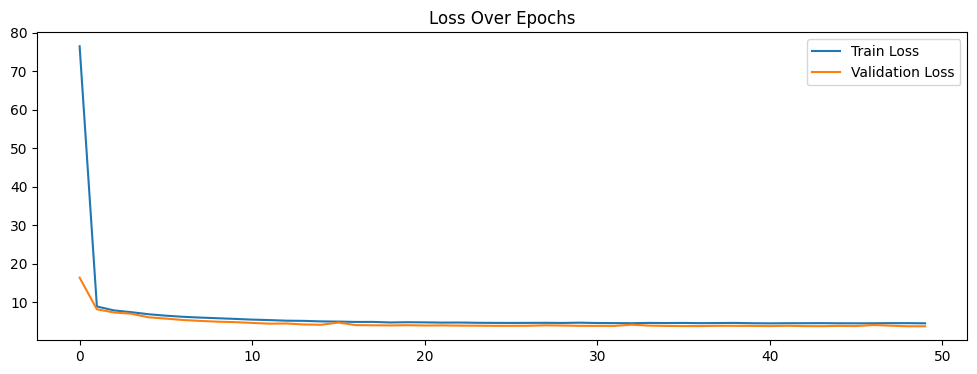

In [6]:
# 신경망 회귀 모델 정의
model_reg = Sequential()
model_reg.add(Dense(64, activation='relu', input_shape=(X_train_reg.shape[1],)))
model_reg.add(Dense(32, activation='relu'))
model_reg.add(Dense(1))  # 회귀 모델이므로 활성화 함수 없음

# 모델 컴파일
model_reg.compile(optimizer='adam', loss='mse')

# 모델 학습
history_reg = model_reg.fit(X_train_reg, y_train_reg, epochs=50, batch_size=32, validation_split=0.2)

# 테스트 데이터로 평가
loss_reg = model_reg.evaluate(X_test_reg, y_test_reg)
print(f'Test MSE: {loss_reg:.4f}')

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()
